Gunawan Christopher

Midterm: MongoDB Notebooks

DATA 320 (Fall 2023)

In [85]:
# Installing Libraries:
%pip install pymongo
%pip install matplotlib
%pip install numpy
%pip install statsmodels

# Importing Libraries:
import pymongo 
import json
import certifi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import statsmodels.formula.api


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
# Loading my credentials file without security breach
with open('ChrisG_Credentials.txt') as f:
    d = json.load(f)

# Connecting to the database using a well-known certificate
myclient = pymongo.MongoClient(d['my_credentials'], tlsCAFile=certifi.where()) 

# Defining my database
mydb = myclient["DATA320_Fall2023"]

# Defining the IMDB Collection's Data-Frame for the year 2014
imdb_pipeline = pd.DataFrame(mydb.Superhero.find({ "release_date": re.compile("2014") }))

# Defining the Metacritic Collection's Data-Frame for the year 2014
metacritic_view = pd.DataFrame(mydb.Metacritic.find({ "release_date": re.compile("2014") }))

# Converting release date column(s) to date & time format
imdb_pipeline.release_date = pd.to_datetime(imdb_pipeline.release_date, errors='coerce')
metacritic_view.release_date = pd.to_datetime(metacritic_view.release_date, errors='coerce')

# Sort the rows based on IMDB's date & time (from the oldest to the newest - in chronological order)
imdb_pipeline.sort_values(by='release_date', ascending=True, inplace = True)

# Converting the necessary columns to numeric format
metacritic_view.score = pd.to_numeric(metacritic_view.score, errors='coerce')
imdb_pipeline.budget = pd.to_numeric(imdb_pipeline.budget, errors='coerce')
imdb_pipeline.runtime = pd.to_numeric(imdb_pipeline.runtime, errors='coerce')
imdb_pipeline.user_rating = pd.to_numeric(imdb_pipeline.user_rating, errors='coerce')
imdb_pipeline.votes = pd.to_numeric(imdb_pipeline.votes, errors='coerce')
imdb_pipeline.opening_weekend = pd.to_numeric(imdb_pipeline.opening_weekend, errors='coerce')
imdb_pipeline.gross_sales = pd.to_numeric(imdb_pipeline.gross_sales, errors='coerce')

# Converting the necessary columns (with multiple data in a field) to arrays
imdb_pipeline.genres = imdb_pipeline["genres"].apply(lambda x: x.split(','))
imdb_pipeline.cast = imdb_pipeline["cast"].apply(lambda x: x.split(','))
imdb_pipeline.director = imdb_pipeline["director"].apply(lambda x: x.split(','))
imdb_pipeline.producer = imdb_pipeline["producer"].apply(lambda x: x.split(','))
imdb_pipeline.company = imdb_pipeline["company"].apply(lambda x: x.split(','))

# Eliminating everything after "::" in mpaa_rating column
imdb_pipeline.mpaa_rating = imdb_pipeline["mpaa_rating"].str.split("::").str[0]

# Merging IMDB and Metacritic
combine_view = pd.merge(imdb_pipeline, metacritic_view, how="inner", on="title")

# Display the data type of each column in the merged table
print(combine_view.dtypes)
print()

# Accounting Format without $ sign (budget & gross sales columns consist of multi-currencies)
pd.options.display.float_format = '{:,.0f}'.format

# Set Column Width to 30
pd.options.display.max_colwidth = 30

# Display the merged table
display(combine_view)
print()

_id_x                      object
id                          int64
title                      object
runtime                   float64
user_rating               float64
votes                       int64
mpaa_rating                object
release_date_x     datetime64[ns]
budget                    float64
opening_weekend           float64
gross_sales               float64
genres                     object
cast                       object
director                   object
producer                   object
company                    object
_id_y                      object
movie_id                    int64
release_date_y     datetime64[ns]
description                object
score                       int64
thumbnail                  object
dtype: object



,_id_x,id,title,runtime,user_rating,votes,mpaa_rating,release_date_x,budget,opening_weekend,...,cast,director,producer,company,_id_y,movie_id,release_date_y,description,score,thumbnail
0,652b30a5ddf01cc03e3878eb,2473682,Paranormal Activity: The M...,84,5,42545,TV-14,2014-01-01,"5,000,000","18,343,611",...,"[Andrew Jacobs, Jorge Dia...",[Christopher Landon],"[Jason Blum, Samson Mucke...","[Paramount Pictures, Blum...",652b2f6dddf01cc03e381be9,18321,2014-01-03,"After being ""marked,"" Jess...",42,https://static.metacritic....
1,652b30a4ddf01cc03e3878bc,1043726,The Legend of Hercules,99,4,54494,PG-13,2014-01-06,"70,000,000","8,600,000",...,"[Kellan Lutz, Gaia Weiss,...",[Renny Harlin],"[Boaz Davidson, Renny Har...","[Summit Entertainment, Mi...",652b2f6dddf01cc03e381c6f,18455,2014-01-10,In Ancient Greece 1200 B.C...,22,https://static.metacritic....
2,652b30a5ddf01cc03e3879bc,2707858,Yves Saint Laurent,106,6,12250,R,2014-01-08,"12,000,000",NaN,...,"[Pierre Niney, Guillaume ...",[Jalil Lespert],"[Yannick Bolloré, Wassim ...","[Wy Productions, SND Film...",652b2f6dddf01cc03e381b95,18237,2014-06-25,A look at the life of Fren...,51,https://static.metacritic....
3,652b30a5ddf01cc03e387937,1821658,The Nut Job,85,6,28445,TV-PG,2014-01-11,"42,000,000",NaN,...,"[Will Arnett, Brendan Fra...",[Peter Lepeniotis],"[Hongjoo Ahn, William Bin...","[Endgame Entertainment, G...",652b2f6dddf01cc03e381c1b,18371,2014-01-17,"Surly, a curmudgeonly squi...",37,https://static.metacritic....
4,652b30a4ddf01cc03e387857,1205537,Jack Ryan: Shadow Recruit,105,6,130926,PG-13,2014-01-15,"60,000,000","17,200,000",...,"[Chris Pine, Keira Knight...",[Kenneth Branagh],"[David Barron, Lorenzo di...","[Paramount Pictures, Skyd...",652b2f6cddf01cc03e381b43,18155,2014-01-17,Jack Ryan appears to be ju...,57,https://static.metacritic....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,652b30a4ddf01cc03e387844,1823664,Annie,118,5,37624,PG,2014-12-07,"65,000,000","15,861,939",...,"[Jamie Foxx, Quvenzhané W...",[Will Gluck],"[Jay Brown, Celia D. Cost...","[Marcy Media, Olive Bridg...",652b2f6dddf01cc03e381c36,18398,2014-12-19,"Annie (Quvenzhané Wallis),...",33,https://static.metacritic....
299,652b30a4ddf01cc03e38780f,2180411,Into the Woods,125,6,140458,PG,2014-12-08,"50,000,000","31,051,923",...,"[Anna Kendrick, Daniel Hu...",[Rob Marshall],"[John DeLuca, Rob Marshal...",[BBL Motion Picture Studio...,652b2f6cddf01cc03e381a9e,17990,2014-12-25,Into the Woods is a modern...,69,https://static.metacritic....
300,652b30a4ddf01cc03e38784f,2788710,The Interview,112,6,327151,R,2014-12-11,"44,000,000","1,085,515",...,"[James Franco, Seth Rogen...","[Evan Goldberg, Seth Rogen]","[James Franco, Evan Goldb...","[Columbia Pictures, LStar...",652b2f6cddf01cc03e381b85,18221,2014-12-25,Dave Skylark (James Franco...,52,https://static.metacritic....
301,652b30a5ddf01cc03e38799c,2298394,Free the Nipple,78,4,1777,Unrated,2014-12-12,"937,000",NaN,...,"[Lina Esco, Lola Kirke, ...",[Lina Esco],"[Lisa Azuelos, Cyan Banis...","[Bethsabée Mucho, Disrupt...",652b2f6dddf01cc03e381c34,18396,2014-12-12,A group of fearless women ...,33,https://static.metacritic....


In [87]:
# Regression Model #1
ols_model = statsmodels.formula.api.ols(
    formula="gross_sales ~ runtime + budget + votes",
    data=combine_view).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.51e-36
Time:                        11:24:11   Log-Likelihood:                -2099.4
No. Observations:                 106   AIC:                             4207.
Df Residuals:                     102   BIC:                             4218.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.267e+07   6.21e+07      1.332      0.1

The mathematical equation of Regression Model #1 is:

Gross Sales = 82,670,000 - 896,700 (Runtime) + 2.9103 (Budget) + 244.0333 (Votes)

For the year 2014, with an initial value of gross sales of 82,670,000 (y-intercept), the value of the gross sales decreases by 896,700 for every one-unit increase in ‘Runtime’ (slope of the line X1), the value of the gross sales increases by 2.9103 for every one-unit increase in ‘Budget’ (slope of the line X2), and the value of the gross sales increases by 244.0333 for every one-unit increase in ‘Votes’ (slope of the line X3).

The R-Squared value of 0.807 indicates that this model is quite successful (where 1 is the highest possible value). 0.807 is more than 0.5; hence, this model is a reliable predictor of gross sales. R-Squared needs to be more than 0.5 to be considered relatively reliable. Therefore, 80.7% of variation is explained.

The 'p-value (Intercept)' of 0.186 and the 'p-value (Runtime)' of 0.127 are not significant/important for predicting gross sales as they are greater than 0.05. But by looking at the 'p-value (Budget)' of 0.000 and the 'p-value (Votes)' of 0.000, they are significant/important for predicting gross sales as they are approximately equal to zero (less than 0.05). Therefore, budget and votes are successful variables; successful variables should indicate that the alternative hypothesis is true.

The condition number of 523,000,000 is large. This might indicate some overlapping (strong multicollinearity) between budget and votes.

I think it is important to know which independent variables are strong predictors of the dependent variable. In this case, we can use this model to forecast gross sales as long as we know the budget and the votes.

In [88]:
# Regression Model #2
ols_model_2 = statsmodels.formula.api.ols(
    formula="score ~ user_rating",
    data=combine_view).fit()
print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     447.4
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.73e-61
Time:                        11:24:11   Log-Likelihood:                -1181.4
No. Observations:                 303   AIC:                             2367.
Df Residuals:                     301   BIC:                             2374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -36.8266      4.376     -8.416      

The mathematical equation of Regression Model #2 is:

Score = -36.8266 + 14.4428 (User Rating)

For the year 2014, with an initial value of score of -36.8266 (y-intercept), the value of the score increases by 14.4428 for every one-unit increase in ‘User Rating’ (slope of the line X).

In addition to gross sales, I think it is also important to know how consistent is IMDB and Metacritic in reviewing the same movies; that was why I created this regression model.

The R-Squared value of 0.598 indicates that this model passes the minimum threshold (where 1 is the highest possible value). 0.598 is more than 0.5; hence, this model is a reliable predictor of score. R-Squared needs to be more than 0.5 to be considered relatively reliable. Therefore, 59.8% of variation is explained.

The 'p-value (Intercept)' of 0.000 and the 'p-value (User Rating)' of 0.000 are significant/important for predicting score as they are less than 0.05 (approximately equal to zero). Therefore, 'Ussr Rating' is a successful variable; a successful variable should indicate that the alternative hypothesis is true.

The condition number of 41.7 is small. So, there is no sign of multicollinearity (as this model has only one independent variable).

I think it is important to know whether the independent variable is a strong predictor of the dependent variable. In this case, we can use this model to forecast score as long as we know the user rating.

Note: My Laptop's RAM is too heavy to run the AI/ML.

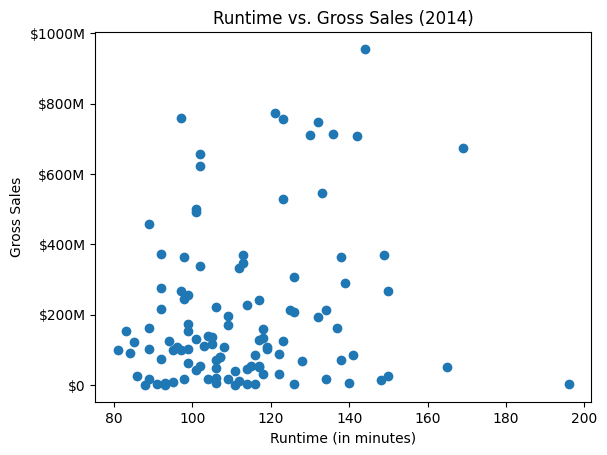

In [89]:
# Plot the Chart (Runtime vs Gross Sales)
plt.scatter(combine_view.runtime, combine_view.gross_sales)

# Giving title to the plot 
plt.title('Runtime vs. Gross Sales (2014)')

# Label X-Axis
plt.xlabel('Runtime (in minutes)')

# Label Y-Axis
plt.ylabel('Gross Sales')

# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# Apply currency formatter
plt.gca().yaxis.set_major_formatter(format_currency)
  
# Function to show plot 
plt.show()

The scatterplot (above) verifies that runtime has a weak (no) correlation with gross sales. Given the model has a pretty high R-Squared of 0.807, the high p-value of 0.127 does not qualify 'runtime' as a successful independent variable in predicting the gross sales. Additionally, by common sense, we do not decide whether or not to watch a movie by its runtime; instead, we focus more on its genre, story-plot, and actors / actresses; for instance, I want to watch that movie because of Brad Pitt and Angelina Jolie.

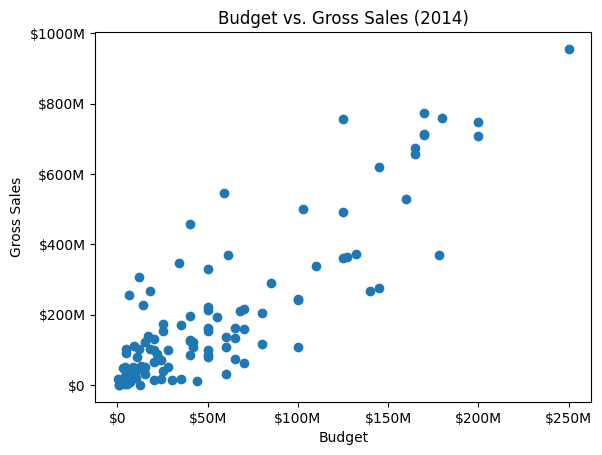

In [90]:
# Plot the Chart (Budget vs Gross Sales)
plt.scatter(combine_view.budget, combine_view.gross_sales)

# Giving title to the plot 
plt.title('Budget vs. Gross Sales (2014)')

# Label X-Axis
plt.xlabel('Budget')

# Label Y-Axis
plt.ylabel('Gross Sales')

# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# Apply currency formatter
plt.gca().yaxis.set_major_formatter(format_currency)
plt.gca().xaxis.set_major_formatter(format_currency)
  
# Function to show plot 
plt.show()

The scatterplot (above) verifies that Budget and Gross Sales have a positive-moderately-strong correlation (with R-Squared of 0.807 and p-value of 0.000). Generally, the higher the budget, the higher the gross sales as the movie production company can spend more in marketing expenses (even if it is not always the case). It is also important to keep in mind that high gross sales do not guarantee profitability as gross sales do not account for total expenses.

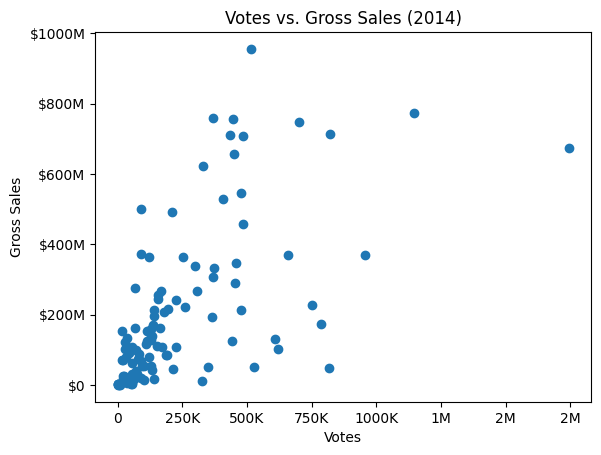

In [91]:
# Plot the Chart (Votes vs Gross Sales)
plt.scatter(combine_view.votes, combine_view.gross_sales)

# Giving title to the plot 
plt.title('Votes vs. Gross Sales (2014)')

# Label X-Axis
plt.xlabel('Votes')

# Label Y-Axis
plt.ylabel('Gross Sales')

# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# A custom formatter for numerical format
def format_numeric(amount, _):
    if amount > 1_000_000:
        return f"{round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"{round(amount / 1_000)}K"
    else:
        return f"{round(amount)}"

# Apply currency formatter
plt.gca().yaxis.set_major_formatter(format_currency)
plt.gca().xaxis.set_major_formatter(format_numeric)
  
# Function to show plot 
plt.show()

The scatterplot (above) verifies that Votes and Gross Sales have a positive-moderately-strong correlation (with R-Squared of 0.807 and p-value of 0.000). This correlation is more obvious around gross sales below $300M and votes below 250K. Beyong this point, it has more outliers; those outliers may represent 'artificial voters'; IMDB may bloat the number of voters unnaturally.

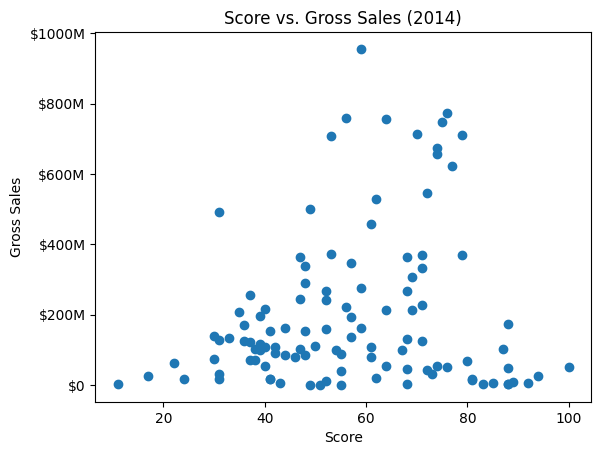

In [92]:
# Plot the Chart (Score vs Gross Sales)
plt.scatter(combine_view.score, combine_view.gross_sales)

# Giving title to the plot 
plt.title('Score vs. Gross Sales (2014)')

# Label X-Axis
plt.xlabel('Score')

# Label Y-Axis
plt.ylabel('Gross Sales')

# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# Apply currency formatter
plt.gca().yaxis.set_major_formatter(format_currency)

# Function to show plot 
plt.show()

Beyond the 2 regression models, the scatterplot (above) shows a weak (no) correlation between score and gross sales. By looking at how the data points spread-out, I can tell that Score vs. Gross Sales definitely have low R-Squared and high p-value. High score and low gross sales indicate bias in scoring by Metacritic.

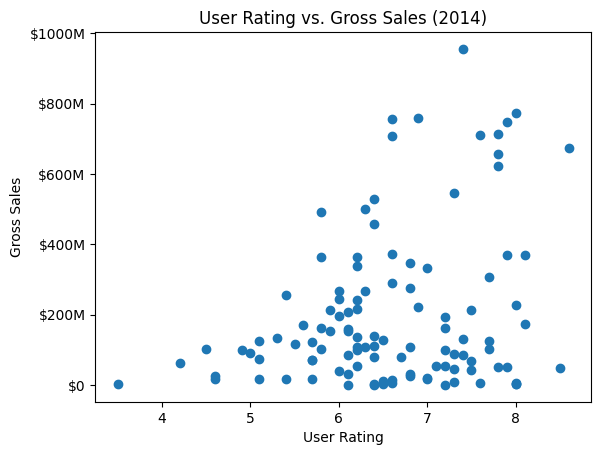

In [93]:
# Plot the Chart (User Rating vs Gross Sales)
plt.scatter(combine_view.user_rating, combine_view.gross_sales)

# Giving title to the plot 
plt.title('User Rating vs. Gross Sales (2014)')

# Label X-Axis
plt.xlabel('User Rating')

# Label Y-Axis
plt.ylabel('Gross Sales')

# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# Apply currency formatter
plt.gca().yaxis.set_major_formatter(format_currency)

# Function to show plot 
plt.show()

Beyond the 2 regression models, the scatterplot (above) shows a weak correlation between user rating and gross sales. By looking at how the data points spread-out, I can tell that User Rating vs. Gross Sales definitely have low R-Squared and low enough p-value. User Rating (IMDB) is better than Score (Metacritic) in predicting gross sales; but, overall, User Rating is still not good enough in predicting gross sales. This may indicate bias in rating by IMDB.

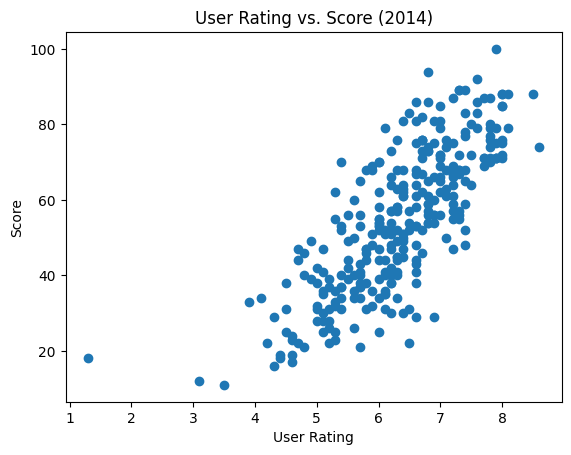

In [94]:
# Plot the Chart (User Rating vs Score)
plt.scatter(combine_view.user_rating, combine_view.score)

# Giving title to the plot 
plt.title('User Rating vs. Score (2014)')

# Label X-Axis
plt.xlabel('User Rating')

# Label Y-Axis
plt.ylabel('Score')

# Function to show plot 
plt.show()

The scatterplot (above) verifies that User Rating (IMDB) and Score (Metacritic) have a positive-moderate correlation (with R-Squared of 0.598 and p-value of 0.000). Given the R-Squared is 0.598, the p-value that is approximately equal to zero makes the scatterplot seems better than what it is. There are only few outliers; outliers represent discrepancies between IMDB's user rating and Metacritic's score. Overall, IMDB's user rating between 4-8 looks pretty in-line with Metacritic's score between 20-90.

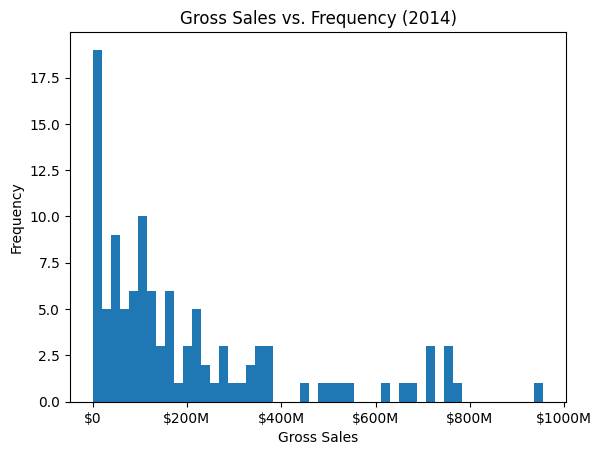

In [95]:
# Plot the Histogram (Gross Sales vs Frequency)
plt.hist(combine_view.gross_sales, bins=50)

# Giving title to the plot
plt.title('Gross Sales vs. Frequency (2014)')

# Label X-Axis
plt.xlabel('Gross Sales')

# Label Y-Axis
plt.ylabel('Frequency')

# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# Apply currency formatter
plt.gca().xaxis.set_major_formatter(format_currency)

# Function to show plot 
plt.show()

Beyond the 2 regression models, the histogram (above) indicates more than 17.5 times of the gross sales are close to $0; there are plenty of small movie production companies who did not perform well. Gross sales beyond $400M are rare; usually, only 'top players' can reach such a high amount of gross sales.

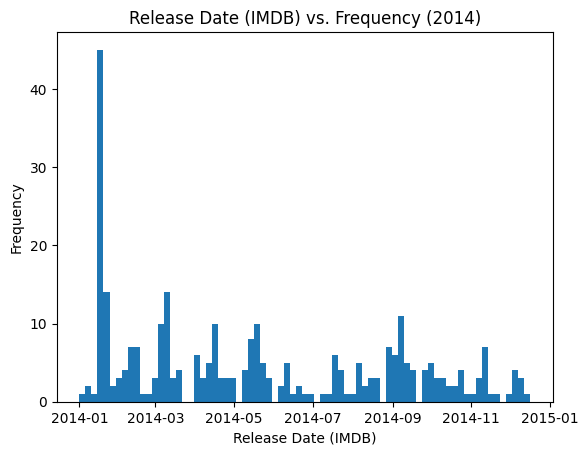

In [96]:
# Plot the Histogram (Release Date (IMDB) vs Frequency)
plt.hist(combine_view.release_date_x, bins=75)

# Giving title to the plot
plt.title('Release Date (IMDB) vs. Frequency (2014)')

# Label X-Axis
plt.xlabel('Release Date (IMDB)')

# Label Y-Axis
plt.ylabel('Frequency')

# Function to show plot 
plt.show()

Beyond the 2 regression models, the histogram (above) indicates that IMDB mainly focuses on movies with release date around January of 2014. IMDB focuses less on movies with release date around mid-end of 2014.

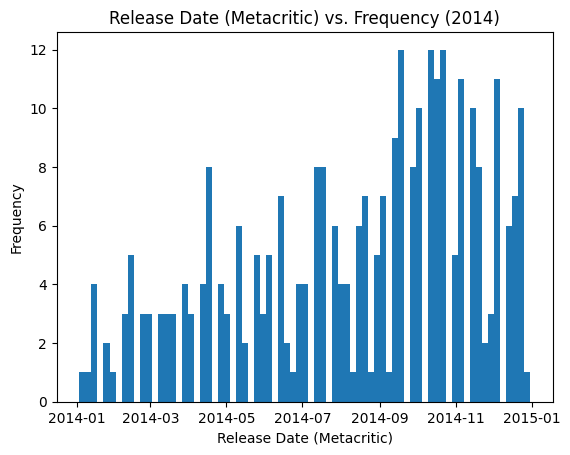

In [97]:
# Plot the Histogram (Release Date (Metacritic) vs Frequency)
plt.hist(combine_view.release_date_y, bins=75)

# Giving title to the plot
plt.title('Release Date (Metacritic) vs. Frequency (2014)')

# Label X-Axis
plt.xlabel('Release Date (Metacritic)')

# Label Y-Axis
plt.ylabel('Frequency')

# Function to show plot 
plt.show()

Beyond the 2 regression models, the histogram (above) indicates that Metacritic mainly focuses on movies with release date around the 4th quarter of 2014. Metacritic focuses less on movies with release date around early 2014.

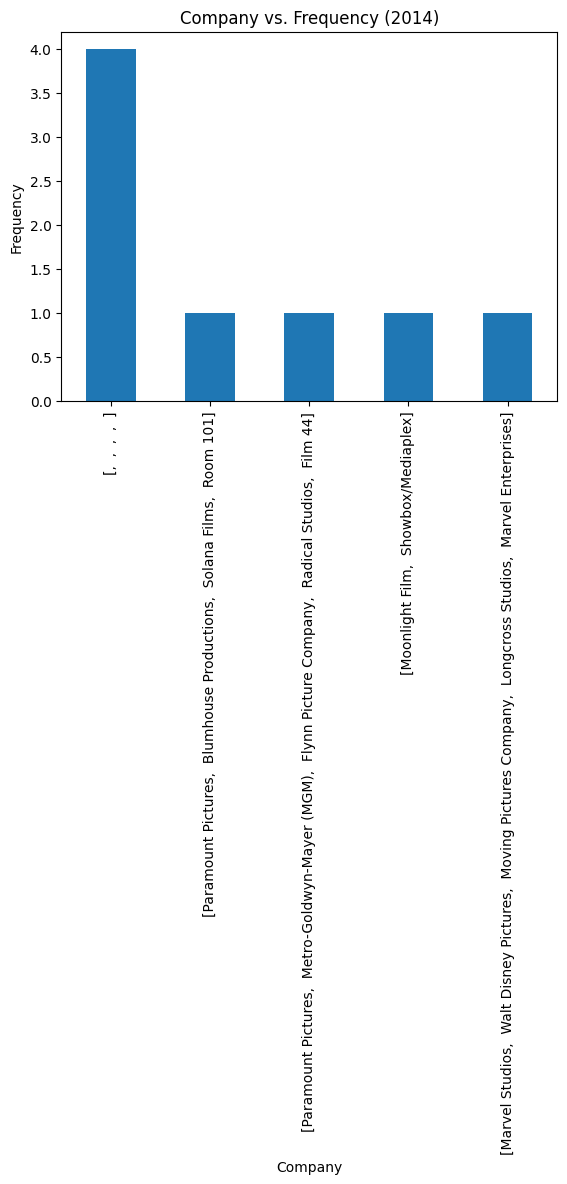

In [98]:
# Find values with top 5 occurrences in 'Company' column
top_5 = (combine_view['company'].value_counts()).iloc[:5]

# Create bar chart to visualize top 5 values
top_5.plot(kind='bar')

# Giving title to the plot
plt.title('Company vs. Frequency (2014)')

# Label X-Axis
plt.xlabel('Company')

# Label Y-Axis
plt.ylabel('Frequency')

# Function to show plot
plt.show()

Beyond the 2 regression models, the bar chart / histogram (above) indicates the top 5 movie production companies by frequency. From here, we can see who are the most active players in 2014. We can ignore the first (most left) bar as there are too many empty arrays. From the 2nd until the 5th bar, fortunately, we can see some famous names, such as Paramount Pictures, MGM, Marvel Studios, Walt Disney Pictures, etc.

Notes:

I assume all of the charts above that use Budget and Gross Sales have the same currency so that I can produce a consistent analysis. In other words, in the analysis shown above, I ignore the multi-currencies that cause unexpected outliers.

As I used manual approach instead of AI/ML, I spent more time on experimenting many combination of equations and year that have the best R-Squared and P-Value. Fortunately, I got a model that generates R-Squared of 0.807 where gross sales is the dependent variable.